# Convolutional Neural Network Architecture
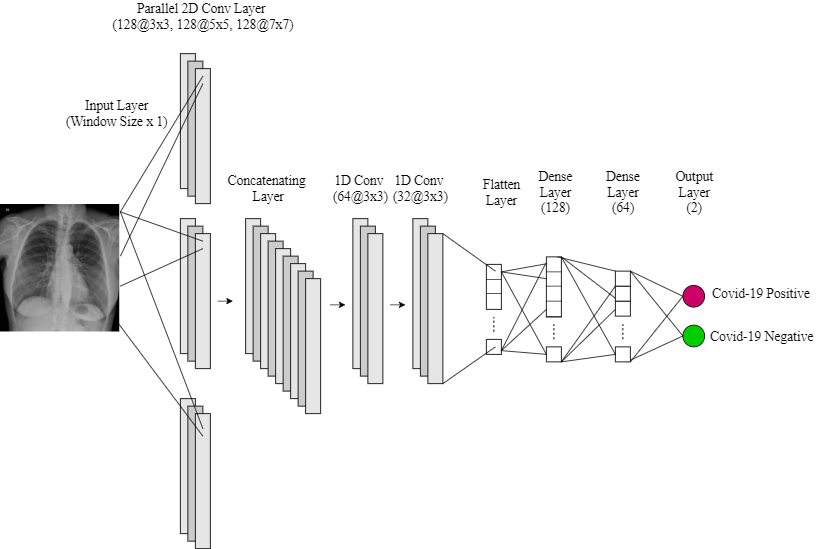

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
import tensorflow as tf
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto',save_weights_only=True)


In [8]:
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
18/18 [==============================] - 14s 707ms/step - loss: 0.5668 - accuracy: 0.7459 - val_loss: 0.4215 - val_accuracy: 0.8387
Epoch 2/20
18/18 [==============================] - 11s 618ms/step - loss: 0.5206 - accuracy: 0.7858 - val_loss: 0.3888 - val_accuracy: 0.8387
Epoch 3/20
18/18 [==============================] - 11s 614ms/step - loss: 0.4557 - accuracy: 0.8040 - val_loss: 0.3534 - val_accuracy: 0.8871
Epoch 4/20
18/18 [==============================] - 10s 569ms/step - loss: 0.4068 - accuracy: 0.8730 - val_loss: 0.3753 - val_accuracy: 0.8710
Epoch 5/20
18/18 [==============================] - 11s 595ms/step - loss: 0.3807 - accuracy: 0.8748 - val_loss: 0.3515 - val_accuracy: 0.9032
Epoch 6/20
18/18 [==============================] - 11s 586ms/step - loss: 0.3604 - accuracy: 0.8875 - val_loss: 0.3150 - val_accuracy: 0.9194
Epoch 7/20
18/18 [==============================] - 11s 615ms/step - loss: 0.3439 - accuracy: 0.8929 - val_loss: 0.3081 - val_accuracy: 0.8710

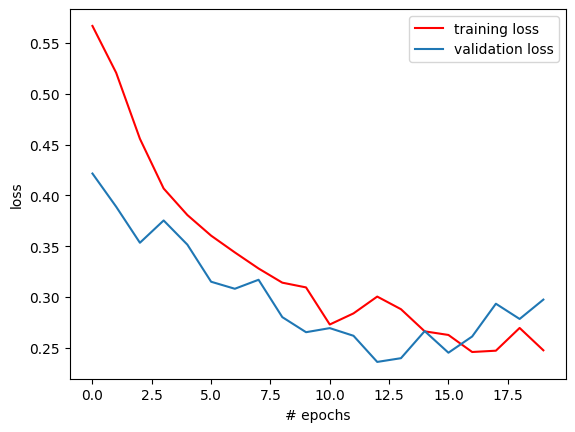

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

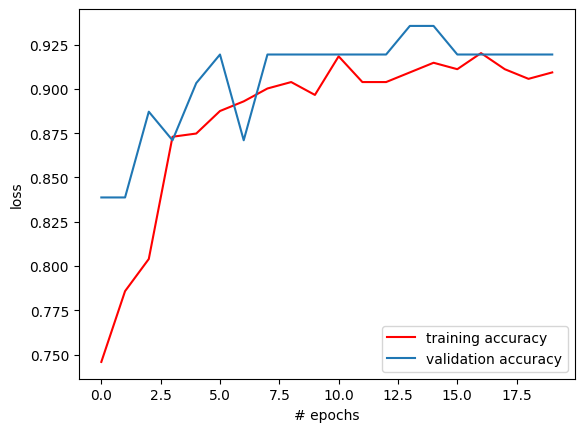

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 0s 70ms/step - loss: 0.3903 - accuracy: 0.8986
[0.3902660310268402, 0.8985507488250732]
